In [1]:
%pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
# loading dataset 
#mnist 

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
# shape of traning data 
print(x_train.shape)

# shape of testing data

print(x_test.shape)

# 28*28 is picture size

(60000, 28, 28)
(10000, 28, 28)


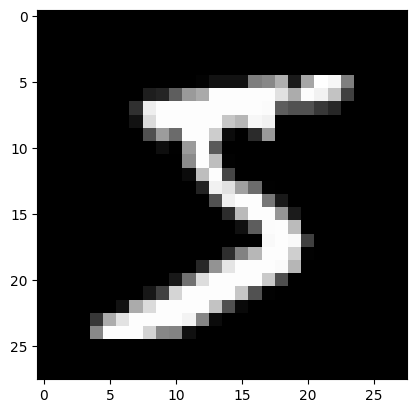

In [6]:
# resolution of image is 28*28
# every image is a 28*28 matrix, matrix of piexls
# every pixel is a number between 0 and 255, 0--> black, 255--> white

# lets see the first image

plt.imshow(x_train[0], cmap='gray')

In [ ]:
# MNIST dataset is a dataset of 28x28 images of handwritten digits and the labels are from 0 to 9

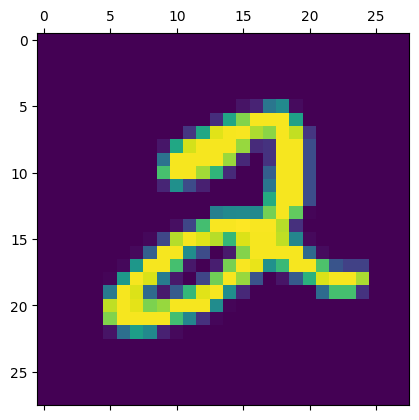

In [8]:
# another way to see the image
plt.matshow(x_train[5])

In [10]:
# what if we want to see the image 
print(x_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [11]:
# now we need to flatten the array 
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

# alternatove way to flatten the array
x_train_flattened = x_train.reshape(-1, 28*28)
x_test_flattened = x_test.reshape(-1, 28*28)


In [12]:
# shape of flattened array
print(x_train_flattened.shape)

(60000, 784)


In [ ]:
# since 28*28 = 784, we know that it flattend correctly

In [ ]:
# Model building 

In [13]:
# we are going to use keras to build the model, no hidden layer in this model
model = keras.Sequential(
    [ 
        keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')

    ]
)

# thats it, we have built the model! 

c:\Users\kani2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#lets compile the model
model.compile(
    optimizer='adam', # makes sure that the model is learning and improving, impoveing the time it takes to reach global minima
    loss='sparse_categorical_crossentropy', # loss function, how far we are from the correct answer
    metrics=['accuracy'] # what measure we are going to use to see how well the model is doing
)

In [20]:
# compiling done!! Now we need to train the model

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9105 - loss: 11.4267
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9202 - loss: 6.8091
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9070 - loss: 6.2871
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9058 - loss: 5.7925
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9042 - loss: 5.5894


In [21]:
# now lets eval the model! 
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8669 - loss: 9.0736  


[8.147337913513184, 0.8835999965667725]